In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Read dataset

In [3]:
df = pd.read_csv('../data/raw/us-city-place-names.csv', encoding='ISO-8859-1')
df.sample(10)

,state_id,state_name,city
48647,56,Wyoming,Bar Nunn
34606,39,Pennsylvania,Kennett Square
27086,33,New York,Adams Center
3671,6,Colorado,Branson
27081,32,Nevada,Yerington
14210,19,Louisiana,Clarence
24687,29,Missouri,Houston
17010,21,Maryland,Stevensville
16872,21,Maryland,Little Orleans
23374,28,Nebraska,Arlington


## Compute basic stats

In [4]:
len(df)

48741

In [5]:
df.isnull().sum()

state_id      0
state_name    0
city          0
dtype: int64

In [6]:
df_deduplicated = df.drop_duplicates('city')
len(df_deduplicated)

24583

<AxesSubplot:ylabel='Density'>

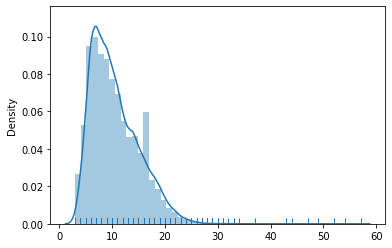

In [7]:
cities = df_deduplicated['city']
lens = [len(s) for s in cities]
sns.distplot(lens, rug=True)

## Analyze outliers

In [8]:
pd.options.display.max_colwidth=70
cities.sort_values(key=lambda s: s.str.len())[:10]

41200    Tye
22422    Roy
9306     Leo
30164    Zap
8247     Joy
29966    Jud
8224     Ina
35150    Rew
1495     Keo
34292    Elm
Name: city, dtype: object

In [9]:
cities.sort_values(key=lambda s: s.str.len())[-20:]


12555                                South Chicago Heights village
31898                                Village of the Branch village
29685                                Peapack and Gladstone borough
48228                               Fontana-on-Geneva Lake village
17285                               Lexington-Fayette urban county
25161                              Village of Four Seasons village
4160                               El Paso de Robles (Paso Robles)
22113                              Village of Grosse Pointe Shores
20047                             Chevy Chase Section Five village
20048                            Chevy Chase Section Three village
7642                             Webster County unified government
30225                           Los Ranchos de Albuquerque village
7293                         Echols County consolidated government
16237                  Greeley County unified government (balance)
7327                  Georgetown-Quitman County unified govern

In [10]:
char_freq = Counter(chain.from_iterable(cities))
sorted(char_freq.items(), key=lambda x: x[1])

[('ñ', 3),
 ('/', 3),
 ('X', 4),
 ('(', 15),
 (')', 15),
 ("'", 27),
 ('j', 52),
 ('Z', 61),
 ('Q', 68),
 ('-', 84),
 ('.', 108),
 ('Y', 134),
 ('q', 153),
 ('U', 168),
 ('z', 295),
 ('x', 364),
 ('J', 406),
 ('I', 424),
 ('K', 653),
 ('V', 741),
 ('O', 762),
 ('T', 1042),
 ('D', 1069),
 ('E', 1110),
 ('N', 1134),
 ('A', 1233),
 ('F', 1300),
 ('f', 1362),
 ('G', 1444),
 ('R', 1551),
 ('W', 1714),
 ('L', 2002),
 ('H', 2075),
 ('P', 2166),
 ('p', 2257),
 ('M', 2564),
 ('B', 2647),
 ('w', 2708),
 ('S', 3132),
 ('m', 3292),
 ('k', 3484),
 ('C', 3518),
 ('b', 3550),
 ('y', 3772),
 ('c', 3874),
 ('d', 5645),
 ('h', 5900),
 ('u', 6361),
 ('v', 6445),
 ('g', 8222),
 ('s', 9229),
 ('t', 11389),
 (' ', 12847),
 ('n', 15172),
 ('r', 15726),
 ('i', 16546),
 ('o', 17874),
 ('a', 21525),
 ('l', 22549),
 ('e', 25270)]

<BarContainer object of 60 artists>

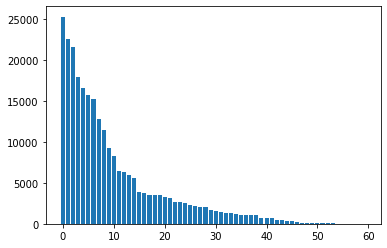

In [11]:
fig, ax = plt.subplots()
ax.bar(x=np.arange(len(char_freq)), height=sorted(char_freq.values(), reverse=True))

## Remove outliers

In [12]:
idx_to_drop = cities.str.contains(r'ñ|\/|\(|\)')
idx_to_drop.sum()

20

In [13]:
cities[idx_to_drop]

3299                                             Fredonia (Biscoe)
4160                               El Paso de Robles (Paso Robles)
4235                                          La Cañada Flintridge
4398                                    San Buenaventura (Ventura)
4874                                                    Cañon City
5051                                           Raymer (New Raymer)
5130                                             Milford (balance)
7151             Athens-Clarke County unified government (balance)
7155     Augusta-Richmond County consolidated government (balance)
13788                                       Indianapolis (balance)
16237                  Greeley County unified government (balance)
17293       Louisville/Jefferson County metro government (balance)
25497                                   Butte-Silver Bow (balance)
30199                                                     Española
40771                                       Naval Air Station/

In [14]:
cleaned_cities = cities[~idx_to_drop]
cleaned_cities

0                Abbeville
1                 Abernant
2               Adamsville
3                  Addison
4                    Adger
               ...        
48649           Bear River
48668     East Thermopolis
48702            Marbleton
48714           Pine Haven
48727    Star Valley Ranch
Name: city, Length: 24563, dtype: object